In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

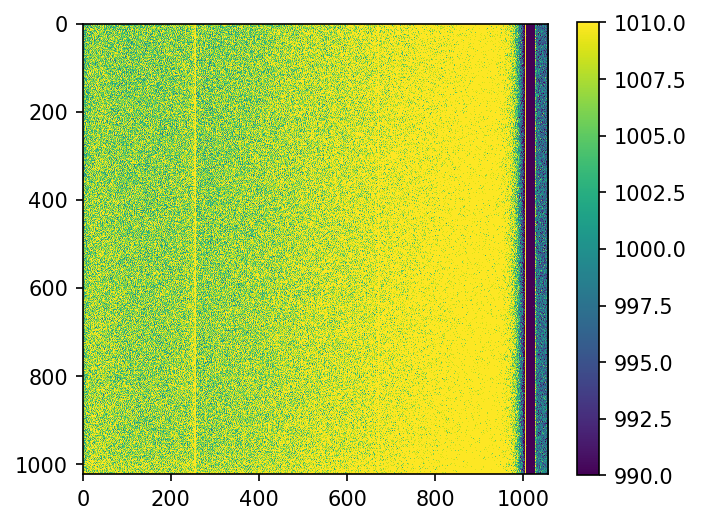

In [4]:
BIAS=[]
for i in range(5):
    bias=fits.open('./Pluto/d'+str(1071+i)+'.fits')
    BIAS.append(bias[0].data)
    bias.close()
plt.figure(figsize=(5,4),dpi=150)
BIAS_m=np.median(BIAS,axis=0)
plt.imshow(BIAS_m,vmin=990,vmax=1010)
plt.colorbar()

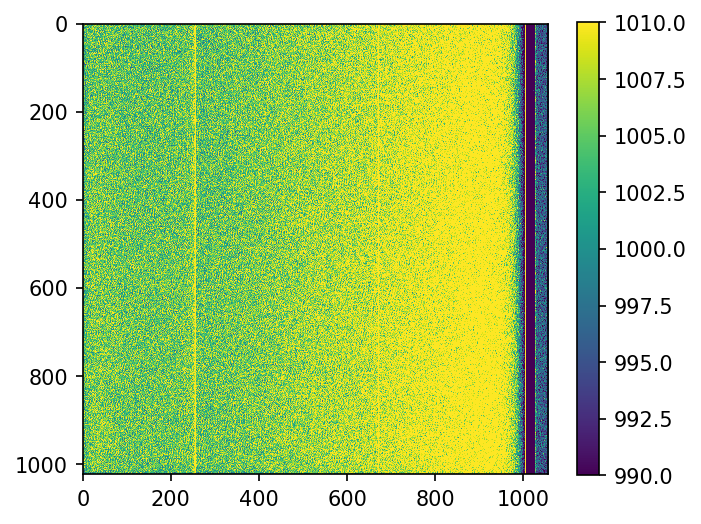

In [5]:
DARK=[]
for i in range(5):
    dark=fits.open('./Pluto/d'+str(1076+i)+'.fits')
    DARK.append(dark[0].data)
    dark.close()
DARK_m=np.median(DARK,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(DARK_m,vmin=990,vmax=1010)
plt.colorbar()

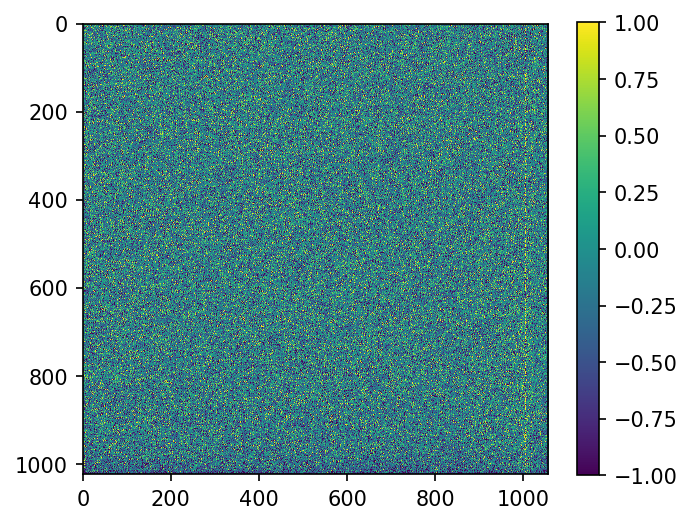

In [6]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow((DARK_m-BIAS_m)/10,vmin=-1,vmax=1)
plt.colorbar()

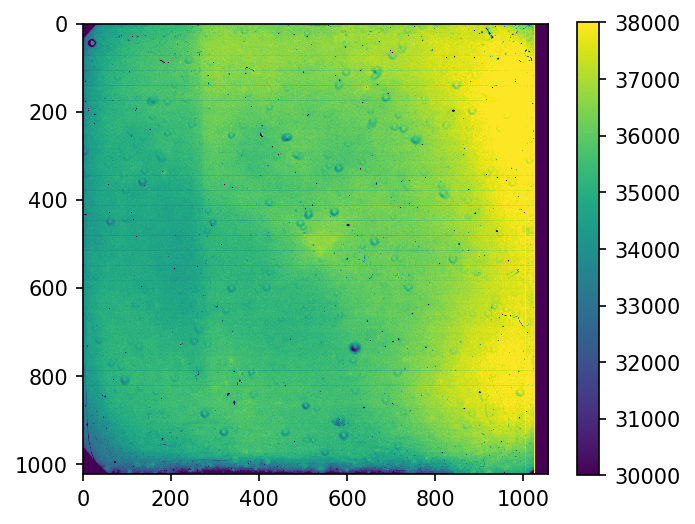

In [7]:
FLAT=[]
for i in range(5):
    flat=fits.open('./Pluto/d'+str(1081+i)+'.fits')
    FLAT.append(flat[0].data)
    flat.close()
FLAT_m=np.median(FLAT,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(FLAT_m,vmin=30000,vmax=38000)
plt.colorbar()

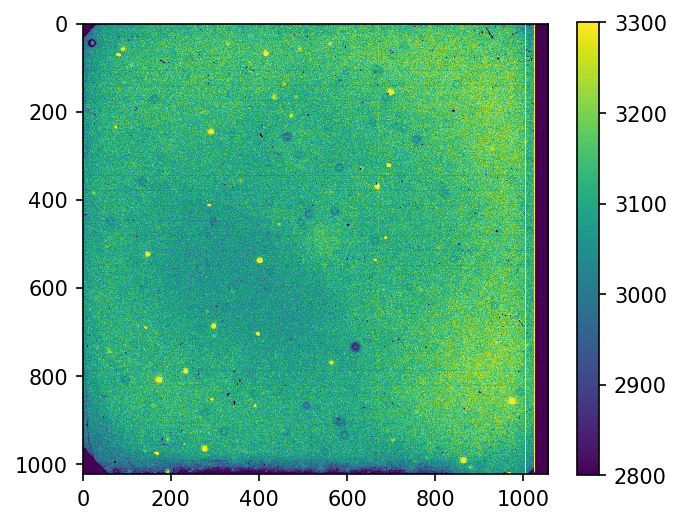

In [8]:
FLAT_sky=[]
for i in range(5):
    flat=fits.open('./Pluto/d'+str(1142+i)+'.fits')
    FLAT_sky.append(flat[0].data)
    flat.close()
FLAT_sky_m=np.median(FLAT_sky,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(FLAT_sky_m,vmin=2800,vmax=3300)
plt.colorbar()

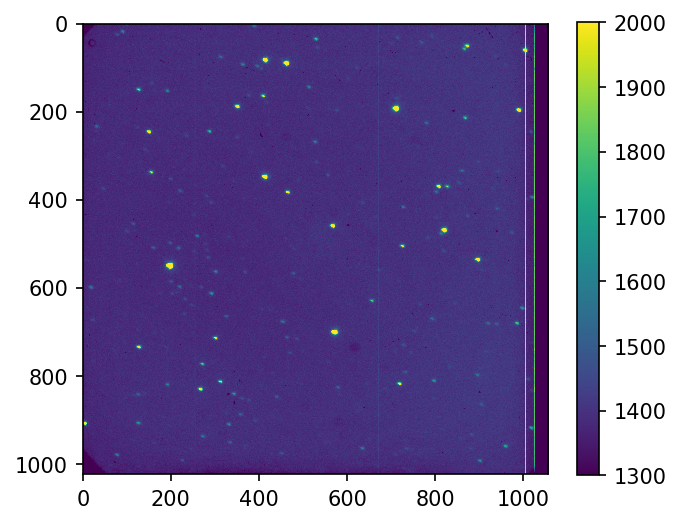

In [9]:
SCI=[]
for i in range(3):
    sci=fits.open('./Pluto/d'+str(2095+i)+'.fits')
    SCI.append(sci[0].data)
    sci.close()
SCI_m=np.median(SCI,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_m,vmin=1300,vmax=2000)
plt.colorbar()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


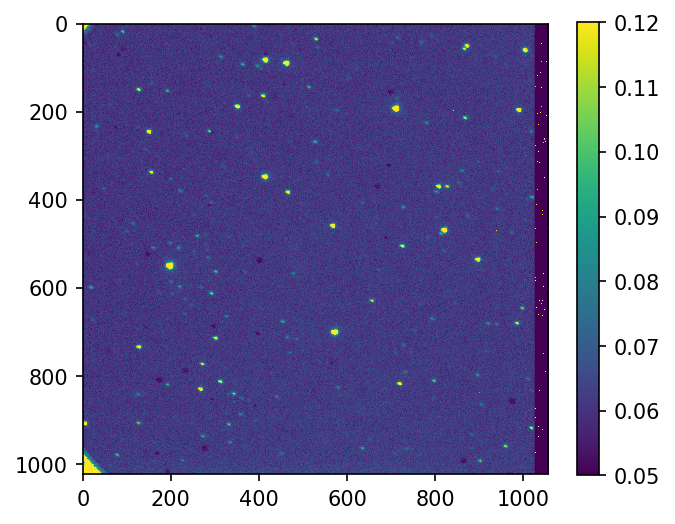

In [17]:
plt.figure(figsize=(5,4),dpi=150)
SCI_final=((SCI_m-BIAS_m)/30-(DARK_m-BIAS_m)/10)/(FLAT_sky_m/10-DARK_m/10)
plt.imshow(SCI_final,vmin=0.05,vmax=0.12)
plt.colorbar()

SCI_final_day1=fits.PrimaryHDU(SCI_final)
SCI_final_day1.writeto('Day2.fits',overwrite=True)

In [11]:
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip
from photutils import SExtractorBackground
from photutils import CircularAperture
from photutils import DAOStarFinder

from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

0.06176331918906177


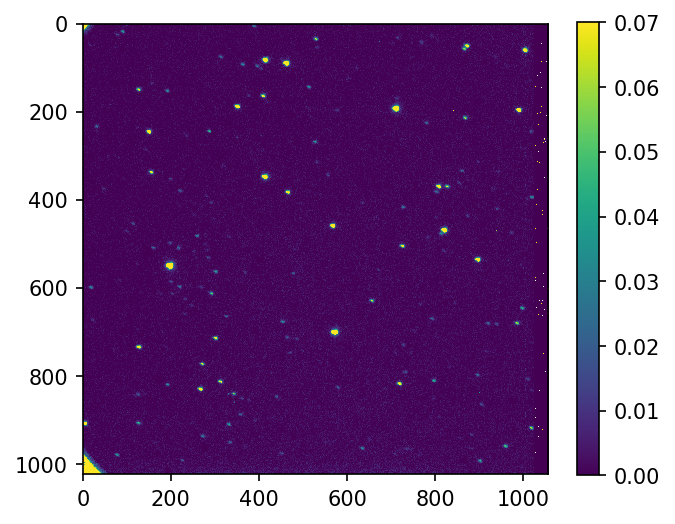

In [12]:
bkg=SExtractorBackground(SigmaClip(sigma=3.0))
bkg_value=bkg.calc_background(SCI_final)
mean,median,std=sigma_clipped_stats(SCI_final,sigma=3.0)
print(median)
SCI_final_no_bkg=SCI_final-median
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_final_no_bkg,vmin=0,vmax=0.07)
plt.colorbar()

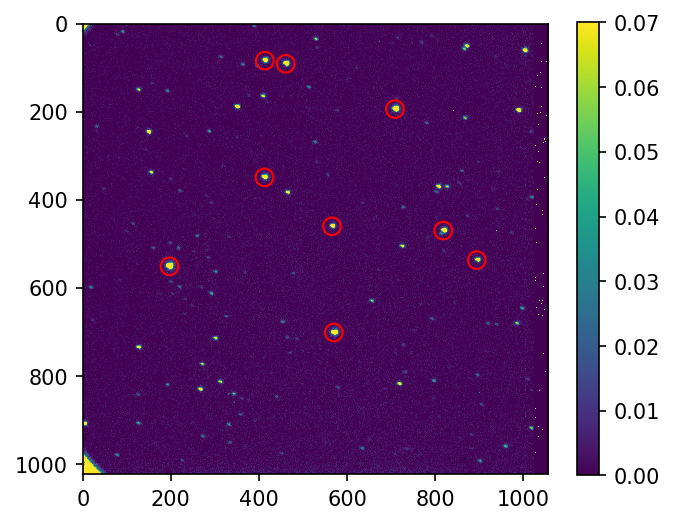

In [14]:
daofind=DAOStarFinder(fwhm=5,threshold=100*std,exclude_border=True)#,roundhi=0.5)
mask=np.zeros(SCI_final_no_bkg.shape,dtype=bool)
mask[0:1024,1000:1060]=True
mask[0:1024,0:100]=True
sources=daofind(SCI_final_no_bkg,mask=mask)
positions=np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures=CircularAperture(positions,r=20.)
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_final_no_bkg,vmin=0,vmax=0.07)
apertures.plot(color='r',lw=1)
plt.colorbar()

In [16]:
sources

<Table length=9>
  id      xcentroid      ...        flux                mag         
int64      float64       ...      float64             float64       
----- ------------------ ... ------------------ --------------------
    1 413.46936561879255 ... 2.0508269518429314  -0.7798225406937592
    2 460.80857677977866 ... 2.1730999429207363  -0.8426992509840715
    3  708.8338455677058 ...  4.057960595134365   -1.520769563742582
    4  412.5276227780581 ... 2.6463056292773937  -1.0566000015972665
    5  565.8412713653677 ... 1.1728503331035998 -0.17310648882605126
    6  818.4400736278147 ... 2.1416091763754346  -0.8268505476239242
    7  894.6529164886612 ... 1.1981737497189395 -0.19629950146190706
    8  196.9350637864108 ...  7.677470990760954  -2.2130454603533005
    9  570.0313587952996 ...  4.412435622380622  -1.6116959551688401

In [18]:
DAY1_X=np.array([434.1857556082681,386.65114098184495,385.6809935651333,170.2563396825147,543.6249096989393])
DAY1_Y=np.array([122.36612690554284,114.8185165142893,379.9314392297317,582.0226508871069,732.5631282995744])
DAY1_X_Pluto=469.22890674857314
DAY1_Y_Pluto=468.3492989570951
DAY2_X=np.array([460.80857677977866,413.46936561879255,412.5276227780581,196.9350637864108,570.0313587952996])
DAY2_Y=np.array([91.05173647625367,83.8025565851776,348.9355125467539,551.0842946753647,701.1532862046578])
DAY2_X_Pluto=565.8412713653677
DAY2_Y_Pluto=460.0817147080211
delta_x=np.mean(DAY2_X-DAY1_X)
delta_y=np.mean(DAY2_Y-DAY1_Y)
delta_Pluto=np.sqrt((DAY2_X_Pluto-delta_x-DAY1_X_Pluto)**2+(DAY2_Y_Pluto-delta_y-DAY1_Y_Pluto)**2)
delta_Pluto*0.368

27.077921801073092

In [21]:
delta_y

-31.134895069607502

In [22]:
SCI_final_day2_no_bkg=fits.PrimaryHDU(SCI_final_no_bkg[int(-delta_y):,int(delta_x):])
SCI_final_day2_no_bkg.writeto('Day2_no_bkg.fits',overwrite=True)